In [1]:
folder = 'C:/Users/saumy/Downloads/OFFSIDE'

In [2]:
#Importing libraries

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
#Image Processing

OFFSIDE = []
for filename in os.listdir(folder):
  imgg = plt.imread(os.path.join(folder,filename))
  gray_img = cv2.cvtColor(imgg , cv2.COLOR_BGR2GRAY)
  resized_img = cv2.resize(gray_img , (224,224))
  OFFSIDE.append(resized_img)

In [3]:
np.shape(OFFSIDE)

(25, 224, 224)

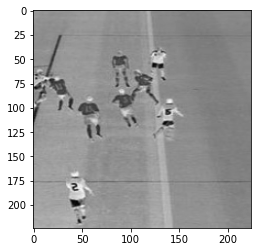

In [4]:
plt.imshow(OFFSIDE[0], cmap='binary') #displaying the image

In [5]:
folder1 = 'C:/Users/saumy/Downloads/ONSIDE'

In [6]:
#Image Processing

ONSIDE = []
for filename in os.listdir(folder1):
  imgg = plt.imread(os.path.join(folder1,filename))
  gray_img = cv2.cvtColor(imgg , cv2.COLOR_BGR2GRAY)
  resized_img = cv2.resize(gray_img , (224,224))
  ONSIDE.append(resized_img)

In [7]:
np.shape(ONSIDE)

(25, 224, 224)

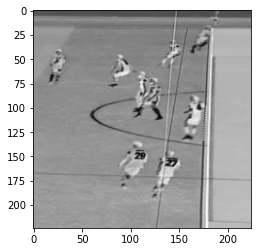

In [8]:
plt.imshow(ONSIDE[0] , cmap = 'binary')

In [9]:
#Creating two arrays for Onside and Offside

ONSIDE = np.array(ONSIDE)
OFFSIDE = np.array(OFFSIDE)

In [10]:
X1 = ONSIDE.reshape(-1 , 224*224)
X2 = OFFSIDE.reshape(-1 , 224*224)

In [11]:
X1.shape , X2.shape

((25, 50176), (25, 50176))

In [12]:
X = np.concatenate([X1 , X2]) #Combining the arrays into one

In [13]:
X.shape

(50, 50176)

In [14]:
y1 = np.zeros(25)
y2 = np.ones(25)
y = np.concatenate([y1 , y2])
y = y.reshape(-1 , 1)

In [15]:
y.shape

(50, 1)

In [16]:
#Importing libraries for ANN

from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten

In [17]:
model = Sequential()
model.add(Dense(512 , activation = 'relu' ,
                        input_dim = 50176))     #We created 8 layers(1 output layer, 1 input layer, 6 hidden layers)
model.add(Dense(512 , activation = 'relu'))
model.add(Dense(512 , activation = 'relu'))
model.add(Dense(512 , activation = 'relu'))
model.add(Dense(256 , activation = 'relu'))
model.add(Dense(256 , activation = 'relu'))
model.add(Dense(128 , activation = 'relu'))

model.add(Dense(1 , activation = 'sigmoid'))

In [18]:
model.summary()#information about the Neural Network

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               25690624  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               3

In [19]:
model.compile(optimizer = 'Adam' , loss = 'BinaryCrossentropy' , metrics = ['accuracy']) 

In [20]:
model.fit(X , y , epochs = 100) #Fitted the model

Epoch 1/100
2/2 [==============================] - 2s 158ms/step - loss: 630.0462 - accuracy: 0.4200
Epoch 2/100
2/2 [==============================] - 0s 165ms/step - loss: 756.2894 - accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 163ms/step - loss: 828.3812 - accuracy: 0.3800
Epoch 4/100
2/2 [==============================] - 0s 167ms/step - loss: 491.0624 - accuracy: 0.5800
Epoch 5/100
2/2 [==============================] - 0s 157ms/step - loss: 513.0305 - accuracy: 0.5800
Epoch 6/100
2/2 [==============================] - 0s 163ms/step - loss: 364.9621 - accuracy: 0.5400
Epoch 7/100
2/2 [==============================] - 0s 149ms/step - loss: 614.8760 - accuracy: 0.5000
Epoch 8/100
2/2 [==============================] - 0s 166ms/step - loss: 758.3738 - accuracy: 0.5000
Epoch 9/100
2/2 [==============================] - 0s 164ms/step - loss: 391.4728 - accuracy: 0.5000
Epoch 10/100
2/2 [==============================] - 0s 151ms/step - loss: 287.4243 - accura

In [29]:
image = plt.imread('C:/Users/saumy/Downloads/Onside_Test/Cover-Photo-132.jpg')
gray_image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY) #Converting the image into gray scale
resized_image = cv2.resize(gray_image , (224,224))

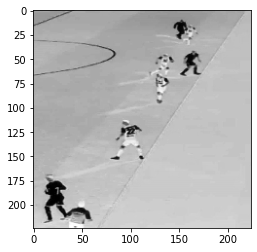

In [30]:
plt.imshow(resized_image, cmap='binary')

In [31]:
np.shape(resized_image)

(224, 224)

In [32]:
ajax = np.array(resized_image)

In [33]:
x=ajax.reshape(-1,224*224)

In [34]:
np.shape(x)

(1, 50176)

In [35]:
model.predict(x)

array([[0.03804609]], dtype=float32)

In [36]:
np.argmax(model.predict(x), axis=-1)

array([0], dtype=int64)